# Multi-Resolution Multi-Robot

Experiments for developing the code for this paper.

In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches


import numpy as np
from algorithms.mrmd.exploration_package import ExplorationPackage, ExplorationPackageSet
from path_generators import get_path_length


In [2]:
def visualize_path(pointlist, area=[], facecolor="yellow", use_arrows= False):

    """Visualize a path (specified as a list of waypoints) and a set of control points (which might have been part of the specification)
    :param area """
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    ax.invert_xaxis()
    # plot the generated path
    xlim_min, xlim_max = np.min(pointlist[:,0])-2, np.max(pointlist[:,0])+2
    ylim_min, ylim_max = np.min(pointlist[:,1])-2, np.max(pointlist[:,1])+2
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)

    # if specified, add the area, and extend the plot 
    if len(area) > 0:
        areapath = Path(area)        
        ax.add_patch(patches.PathPatch(areapath, fill=True, facecolor=facecolor))
        xlim_min, xlim_max = np.min(area[:,0])-2, np.max(area[:,0])+2
        ylim_min, ylim_max = np.min(area[:,1])-2, np.max(area[:,1])+2

    #ax.set_xlim(xlim_min, xlim_max)
    #ax.set_ylim(ylim_min, ylim_max)
    # add the trajectory
    if use_arrows == False:
        path = Path(pointlist)
        ax.add_patch(patches.PathPatch(path, fill=False))
    else:
        previous_point = None
        for point in pointlist:
            if previous_point is not None:
                ax.add_patch(patches.Arrow(previous_point[0], previous_point[1], point[0] - previous_point[0], point[1] - previous_point[1]))     
            previous_point = point   
    #plt.show()
    return ax


1821.1001238539702


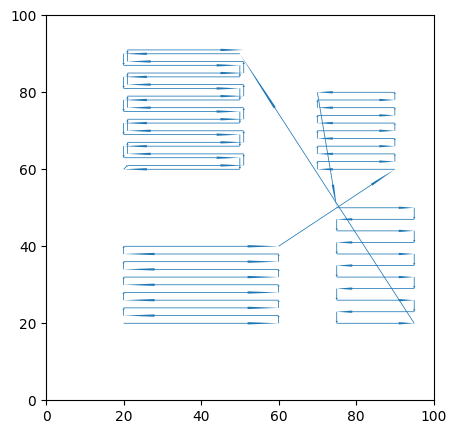

In [3]:
ep1 = ExplorationPackage(20, 60, 20, 40, 2)
path1 = ep1.lawnmower_horizontal_bottom_left()


ep2 = ExplorationPackage(70, 90, 60, 80, 2)
path2 = ep2.lawnmower_horizontal_bottom_right()

ep3 = ExplorationPackage(75, 95, 20, 50, 3)
path3 = ep3.lawnmower_horizontal_top_left()

ep4 = ExplorationPackage(20, 50, 60, 90, 3)
path4= ep4.lawnmower_horizontal_top_right()

path5 = ep4.lawnmower_horizontal_bottom_left(shift=[1,1])


#path = np.concatenate((path1, path2, path3, path4), axis=0)

path = np.concatenate((path1, path2, path3, path4, path5), axis=0)

print(get_path_length(path))

#print(path)
ax = visualize_path(path, use_arrows=True)
#plt.draw()
#plt.show()

### Trying out the exploration package set model

1951.030224450607
1912.6440753679574
1897.1219436283968
1891.833565626862
1882.4452649044151
1882.283487009002
1879.811542738254
1879.4484464554405
1850.5751421707355
1842.927436439233
1831.3167471525212
1824.2961774926066
1813.9143201518061
1805.2856014695726
1790.9656314875115
1782.3963641439536
1782.03326786114
1779.9985610621115
1775.120134568386
1774.4685665040388
1767.3093161156762
1766.4639898342352
1740.3526108295741
1739.5072845481332
1737.467995362725
1736.6226690812844
1736.4272087797772
1720.4055747014277
1717.557204486474
1716.3779882658698
1713.529618050916
1713.4664616481994
1711.8526491159125


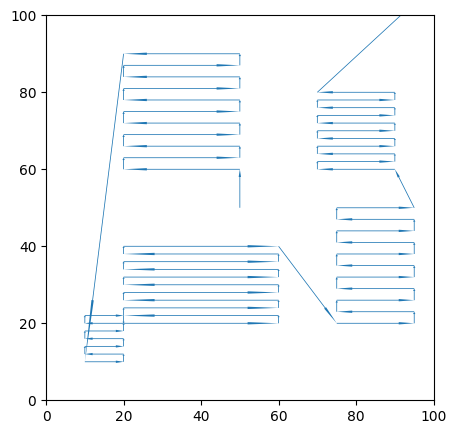

In [7]:
ep1 = ExplorationPackage(20, 60, 20, 40, 2)
ep2 = ExplorationPackage(70, 90, 60, 80, 2)
ep3 = ExplorationPackage(75, 95, 20, 50, 3)
ep4 = ExplorationPackage(20, 50, 60, 90, 3)
ep5 = ExplorationPackage(10, 20, 10, 20, 2)


eps = ExplorationPackageSet()
eps.add_ep(ep1)
eps.add_ep(ep2)
eps.add_ep(ep3)
eps.add_ep(ep4)
eps.add_ep(ep5)

path = eps.find_shortest_path(start=[50,50], end=[210,210])

ax = visualize_path(path, use_arrows=True)

